In this notebook, we demonstrate the construction of an "Elbow Plot" to select cluster size.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

First we load the IRIS Dataset:

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This dataset is already ordered by species. We scramble the rows:

In [4]:
iris_df = iris_df.sample(frac=1)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
2,4.7,3.2,1.3,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
105,7.6,3.0,6.6,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica


Next we set aside some test data for each label.

In [6]:
from sklearn.model_selection import train_test_split

features = iris_df.drop('species', axis=1).copy()
labels = iris_df.species.copy()

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
        test_size=20, stratify=labels, random_state=0)

Next we write a function that, given n, computes the cluster centers assuming n clusters and returns within-cluster 
sum of squared errors.

In [7]:
from sklearn.cluster import KMeans

def within_cluster_sse(n, train_f, test_f):
    assert n > 1
    assert len(train_f.columns.symmetric_difference(test_f.columns)) == 0
    
    clusterer = KMeans(n_clusters=n, random_state=0)
    assignments = clusterer.fit(train_f).predict(test_f)
    
    results_df = test_f.copy()
    results_df.index = assignments
    
    means = pd.DataFrame(index=range(0, n), 
                         data=clusterer.cluster_centers_, 
                         columns=test_f.columns)
    
    within_cluster_sse = results_df.sub(means).pow(2)    
    return within_cluster_sse.sum(axis=1).sum()     

Finally, we call the above function for a range of values of n and plot the Within-cluster SSE values against n.

In [8]:
sse_values = {n: within_cluster_sse(n, train_features, test_features) for n in range(2, 21)}
sse_values = pd.Series(sse_values)

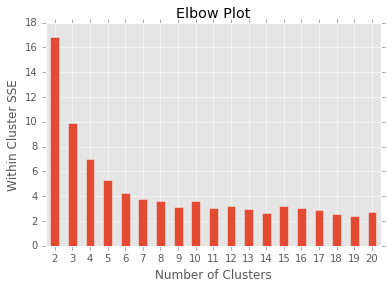

In [9]:
ax = sse_values.plot(kind='bar', title='Elbow Plot', rot='0')
labels = ax.set(xlabel='Number of Clusters', ylabel='Within Cluster SSE')